In [1]:
from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker

# Database connection settings.
DB_HOST = "192.168.1.103"
DB_PORT = "5432"
DB_NAME = "Capstone"
DB_USER = "postgres"
DB_PASSWORD = "Google#13"

# Create engine and session.
engine = create_engine(
    f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}",
    pool_size=20,
    max_overflow=40
)
Session = sessionmaker(bind=engine)
session = Session()

In [2]:
from sqlalchemy import create_engine, MetaData, Table
from sqlalchemy.orm import sessionmaker
import matplotlib.pyplot as plt
import pandas as pd


                 user_id  user_lifetime_days review_frequency
0  117132441140924509158                   1             1.00
1  117132449439104655116                   1             1.00
2  117436616885346310790                 784             3.00
3  117132471438625433716                   1             1.00
4  117436619310229111035                3118            11.00


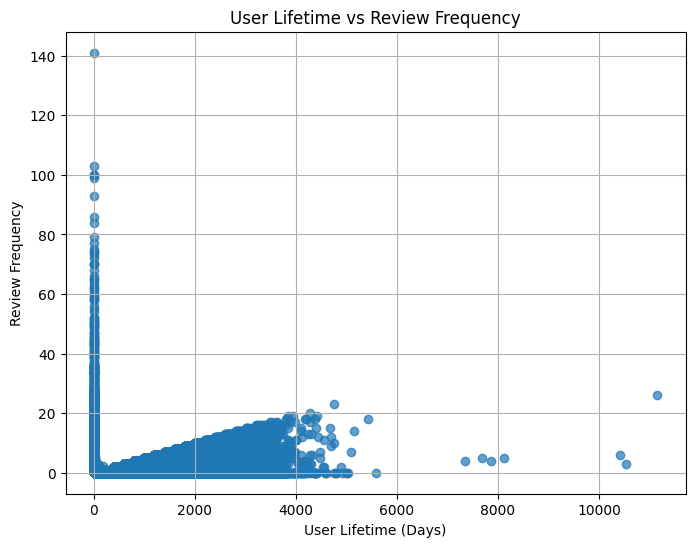

In [8]:

metadata = MetaData()
users = Table('users', metadata, autoload_with=engine)
# Query the columns: user_id, user_lifetime_days, and review_frequency
query = session.query(
    users.c.user_id,
    users.c.user_lifetime_days,
    users.c.review_frequency
)
results = query.all()

# Convert the query results to a pandas DataFrame for easier plotting
df = pd.DataFrame(results, columns=["user_id", "user_lifetime_days", "review_frequency"])

# Print the first few rows of the DataFrame (optional)
print(df.head())

# Create a scatter plot: user_lifetime_days vs review_frequency
plt.figure(figsize=(8, 6))
plt.scatter(df['user_lifetime_days'], df['review_frequency'], alpha=0.7)
plt.xlabel('User Lifetime (Days)')
plt.ylabel('Review Frequency')
plt.title('User Lifetime vs Review Frequency')
plt.grid(True)
plt.show()

